# Problem Statement :

- The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.
  
- The company can utilise this knowledge for its portfolio and risk assessment. 

In [1]:
#  import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# setting display items limits 
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

#  ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Extracting CSV files into dataframe
df = pd.read_csv(r'B:\UpGrad\SQL & Statistics Essentials\Lending_CaseStudy\loan\loan.csv',low_memory=False)

In [4]:
# Checking rows & columns 
df.shape

(39717, 111)

In [5]:
# Checking for Datatypes
df.dtypes.value_counts()

float64    74
object     24
int64      13
Name: count, dtype: int64

In [6]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
# checking for columns all having null values
df.isnull().all().sum()  # 54 columns are having all values as null 

np.int64(54)

In [8]:
# Calculating Null Values in DataFrame
null_analysis = (df.isnull().sum() / len(df)) * 100
null_analysis

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.585543
purpose                             0.000000
title                               0.027696
zip_code  

- 100% Null Values - 54 Columns 

- Other Null columns > 30% Null Values
  - 'desc', 32%
  - 'mths_since_last_delinq'  64 % ,
  - 'mths_since_last_record'  92 % ,
  - 'next_pymnt_d'    97 % ,


In [9]:
# considering threshold value as 30 i.e if there are more than 30% values are null will drop that feature 
null_columns = null_analysis[null_analysis>30].index.tolist()
null_columns

['desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_pa

In [10]:
df = df.drop(null_columns,axis=1)

In [11]:
# shape after removing (58) null values columns 
df.shape

(39717, 53)

In [12]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [13]:
# Checking for constant/unique values 
unique_percentage = df.nunique() 
unique_percentage

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

- id and member_id both have all values as unique so we can say that for each loanID there is unique customer. Also, these are IDs so not relevant for analysis.
- Columns those are having only 1 value as unique means those columns are constant so we can remove them as well.
1. policy_code ->  Having 1 as constant value (All products are publically available) 
2. collections_12_mths_ex_med (Number of collections in 12 months excluding medical collections)->  All values are 0.
3. application_type -> All are INDIVIDUAL
4. acc_now_delinq -> All values are 0 
5. chargeoff_within_12_mths -> All values are 0 
6. delinq_amnt -> All values are 0 
7. tax_liens -> All values are 0 
8. pymnt_plan -> All values are 'n'
9. initial_list_status -> All values are 'f'

In [14]:
# Further removing some more columns based on duplicates and domain understanding
ls_drop1 = ['id','member_id','policy_code','collections_12_mths_ex_med','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','pymnt_plan','initial_list_status']

In [15]:
df = df.drop(ls_drop1,axis = 1)

In [16]:
df.shape

(39717, 42)

In [17]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


There are some features that are not required to be considered before approving loan
1. delinq_2yrs (The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years)
2. revol_bal (Total credit revolving balance) -> considering revol_util
3. out_prncp (Remaining outstanding principal for total amount funded)
4. total_pymnt (Payments received to date for total amount funded)
5. total_rec_prncp (Principal received to date)
6. total_rec_int (Interest received to date)
7. total_rec_late_fee (Late fees received to date)
8. recoveries 
9. collection_recovery_fee
10. last_pymnt_d
11. last_pymnt_amnt

There are some features related to customer personal information that are not required to be considered : 
1. emp_title
2. url
3. zip_code
4. addr_state
5. title

There are some investor related features that we don't need to consider :

1. funded_amnt_inv (The total amount committed by investors for that loan at that point in time.)
2. out_prncp_inv (Remaining outstanding principal for portion of total amount funded by investors)
3. total_pymnt_inv (Payments received to date for portion of total amount funded by investors)


In [18]:
ls_drop2 = ['emp_title','url','zip_code','addr_state','title','delinq_2yrs','revol_bal','out_prncp','total_pymnt','total_rec_prncp','total_rec_int',
            'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','funded_amnt_inv','out_prncp_inv','total_pymnt_inv']

In [19]:
len(ls_drop2) 

19

In [20]:
df = df.drop(ls_drop2,axis=1)

In [21]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9,May-16,0.0
1,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4,Sep-13,0.0
2,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10,May-16,0.0
3,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37,Apr-16,0.0
4,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38,May-16,0.0


In [22]:
df.shape

(39717, 23)

In [23]:
df.pub_rec.value_counts()

pub_rec
0    37601
1     2056
2       51
3        7
4        2
Name: count, dtype: int64

In [24]:
df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [25]:
# dropping pub_rec_bankruptcies -> because pub_rec already exists
df = df.drop('pub_rec_bankruptcies',axis=1)

In [26]:
df

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,last_credit_pull_d
0,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9,May-16
1,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4,Sep-13
2,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10,May-16
3,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37,Apr-16
4,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38,May-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,11.33,Nov-90,0,13,0,13.10%,40,Jun-10
39713,8500,8500,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,6.40,Dec-86,1,6,0,26.90%,9,Jul-10
39714,5000,5000,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,2.30,Oct-98,0,11,0,19.40%,20,Jun-07
39715,5000,5000,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,3.72,Nov-88,0,17,0,0.70%,26,Jun-07


In [27]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'last_credit_pull_d'],
      dtype='object')

In [28]:
df.loan_status.value_counts()


loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [29]:
# dropping data for loan status as current -> 1140 rows
df = df[df.loan_status != 'Current']

In [30]:
df.shape

(38577, 22)

In [31]:
# chceking for null values 
df.isnull().sum()

loan_amnt                 0
funded_amnt               0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
last_credit_pull_d        2
dtype: int64

In [32]:
df.emp_length.value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [33]:
# As emp_length is categorical data and observing value_counts() mostly lies inside 10+ years as lenth so replacing null with it 
df['emp_length'] = df['emp_length'].fillna('10+ years')


In [34]:
df.isnull().sum()

loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_util             50
total_acc               0
last_credit_pull_d      2
dtype: int64

In [35]:
# rest for revol_util and last_credit_pull_d having very few null values so we can drop those values
df = df.dropna(axis=0)

In [36]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,last_credit_pull_d
0,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9,May-16
1,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4,Sep-13
2,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10,May-16
3,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37,Apr-16
5,5000,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12,Jan-16


In [37]:
df['loan_status'] = df['loan_status'].replace({'Charged Off': 'Default', 'Fully Paid': 'Non-default'})

In [38]:
# checking dtypes
df.dtypes

loan_amnt                int64
funded_amnt              int64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
dti                    float64
earliest_cr_line        object
inq_last_6mths           int64
open_acc                 int64
pub_rec                  int64
revol_util              object
total_acc                int64
last_credit_pull_d      object
dtype: object

In [39]:
# converting term into interger column format as it has only two values 
df['term'] = df['term'].apply(lambda x: int(x.strip(' months')))


In [40]:
df.sample()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,last_credit_pull_d
2579,20000,20000,36,12.69%,670.9,B,B5,2 years,RENT,94500.0,Verified,Dec-11,Non-default,debt_consolidation,21.3,Sep-92,0,17,0,74.20%,28,May-16


In [41]:
# converting int_rate into interger column format
df['int_rate'] = df['int_rate'].apply(lambda x : float(x.replace('%','')))

In [42]:
df

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,last_credit_pull_d
0,5000,5000,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Non-default,credit_card,27.65,Jan-85,1,3,0,83.70%,9,May-16
1,2500,2500,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Default,car,1.00,Apr-99,5,3,0,9.40%,4,Sep-13
2,2400,2400,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Non-default,small_business,8.72,Nov-01,2,2,0,98.50%,10,May-16
3,10000,10000,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Non-default,other,20.00,Feb-96,1,10,0,21%,37,Apr-16
5,5000,5000,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Non-default,wedding,11.20,Nov-04,3,9,0,28.30%,12,Jan-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,36,8.07,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Non-default,home_improvement,11.33,Nov-90,0,13,0,13.10%,40,Jun-10
39713,8500,8500,36,10.28,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Non-default,credit_card,6.40,Dec-86,1,6,0,26.90%,9,Jul-10
39714,5000,5000,36,8.07,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Non-default,debt_consolidation,2.30,Oct-98,0,11,0,19.40%,20,Jun-07
39715,5000,5000,36,7.43,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Non-default,other,3.72,Nov-88,0,17,0,0.70%,26,Jun-07


In [43]:
df['emp_length'] = df['emp_length'].apply(lambda x: 0 if '<' in x else (int(x.split('+')[0]) if '+' in x else int(x.split()[0])))
df.emp_length =  df.emp_length.astype(int)

In [44]:
df.dtypes

loan_amnt                int64
funded_amnt              int64
term                     int64
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length               int64
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
dti                    float64
earliest_cr_line        object
inq_last_6mths           int64
open_acc                 int64
pub_rec                  int64
revol_util              object
total_acc                int64
last_credit_pull_d      object
dtype: object

In [45]:
df

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,last_credit_pull_d
0,5000,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Non-default,credit_card,27.65,Jan-85,1,3,0,83.70%,9,May-16
1,2500,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Default,car,1.00,Apr-99,5,3,0,9.40%,4,Sep-13
2,2400,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Non-default,small_business,8.72,Nov-01,2,2,0,98.50%,10,May-16
3,10000,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Non-default,other,20.00,Feb-96,1,10,0,21%,37,Apr-16
5,5000,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Non-default,wedding,11.20,Nov-04,3,9,0,28.30%,12,Jan-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,36,8.07,78.42,A,A4,4,MORTGAGE,110000.0,Not Verified,Jul-07,Non-default,home_improvement,11.33,Nov-90,0,13,0,13.10%,40,Jun-10
39713,8500,8500,36,10.28,275.38,C,C1,3,RENT,18000.0,Not Verified,Jul-07,Non-default,credit_card,6.40,Dec-86,1,6,0,26.90%,9,Jul-10
39714,5000,5000,36,8.07,156.84,A,A4,0,MORTGAGE,100000.0,Not Verified,Jul-07,Non-default,debt_consolidation,2.30,Oct-98,0,11,0,19.40%,20,Jun-07
39715,5000,5000,36,7.43,155.38,A,A2,0,MORTGAGE,200000.0,Not Verified,Jul-07,Non-default,other,3.72,Nov-88,0,17,0,0.70%,26,Jun-07


In [46]:
# coverting revol_util as int type 
df.revol_util = df.revol_util.apply(lambda x:float(x.split('%')[0]))

In [47]:
df.dtypes

loan_amnt                int64
funded_amnt              int64
term                     int64
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length               int64
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
dti                    float64
earliest_cr_line        object
inq_last_6mths           int64
open_acc                 int64
pub_rec                  int64
revol_util             float64
total_acc                int64
last_credit_pull_d      object
dtype: object

In [48]:
# df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
# 'earliest_cr_line','last_credit_pull_d'].

In [49]:
df

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,last_credit_pull_d
0,5000,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Non-default,credit_card,27.65,Jan-85,1,3,0,83.7,9,May-16
1,2500,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Default,car,1.00,Apr-99,5,3,0,9.4,4,Sep-13
2,2400,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Non-default,small_business,8.72,Nov-01,2,2,0,98.5,10,May-16
3,10000,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Non-default,other,20.00,Feb-96,1,10,0,21.0,37,Apr-16
5,5000,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Non-default,wedding,11.20,Nov-04,3,9,0,28.3,12,Jan-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,36,8.07,78.42,A,A4,4,MORTGAGE,110000.0,Not Verified,Jul-07,Non-default,home_improvement,11.33,Nov-90,0,13,0,13.1,40,Jun-10
39713,8500,8500,36,10.28,275.38,C,C1,3,RENT,18000.0,Not Verified,Jul-07,Non-default,credit_card,6.40,Dec-86,1,6,0,26.9,9,Jul-10
39714,5000,5000,36,8.07,156.84,A,A4,0,MORTGAGE,100000.0,Not Verified,Jul-07,Non-default,debt_consolidation,2.30,Oct-98,0,11,0,19.4,20,Jun-07
39715,5000,5000,36,7.43,155.38,A,A2,0,MORTGAGE,200000.0,Not Verified,Jul-07,Non-default,other,3.72,Nov-88,0,17,0,0.7,26,Jun-07


In [50]:
df.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
count,38525.000000,38525.000000,38525.000000,38525.000000,38525.000000,38525.000000,3.852500e+04,38525.000000,38525.000000,38525.000000,38525.000000,38525.000000,38525.000000
mean,11055.683323,10792.361454,41.904530,11.927523,322.690342,5.078728,6.880719e+04,13.276920,0.871772,9.281609,0.055445,48.703114,22.067567
std,7348.380985,7090.203337,10.336731,3.690173,208.647833,3.603060,6.421591e+04,6.671089,1.071775,4.400175,0.237859,28.364089,11.422375
min,500.000000,500.000000,36.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000
5%,2400.000000,2400.000000,36.000000,6.170000,70.984000,0.000000,2.400000e+04,2.110000,0.000000,3.000000,0.000000,2.600000,7.000000
10%,3135.000000,3075.000000,36.000000,7.140000,99.230000,0.000000,3.000000e+04,4.060000,0.000000,4.000000,0.000000,8.400000,9.000000
25%,5325.000000,5200.000000,36.000000,8.940000,165.740000,2.000000,4.000000e+04,8.140000,0.000000,6.000000,0.000000,25.200000,13.000000
50%,9600.000000,9600.000000,36.000000,11.710000,278.150000,4.000000,5.900000e+04,13.370000,1.000000,9.000000,0.000000,49.100000,20.000000
75%,15000.000000,15000.000000,36.000000,14.350000,425.870000,9.000000,8.200000e+04,18.560000,1.000000,12.000000,0.000000,72.300000,29.000000
90%,21600.000000,20000.000000,60.000000,16.820000,621.268000,10.000000,1.150000e+05,22.290000,2.000000,15.000000,0.000000,87.800000,38.000000


## Univariate Analysis

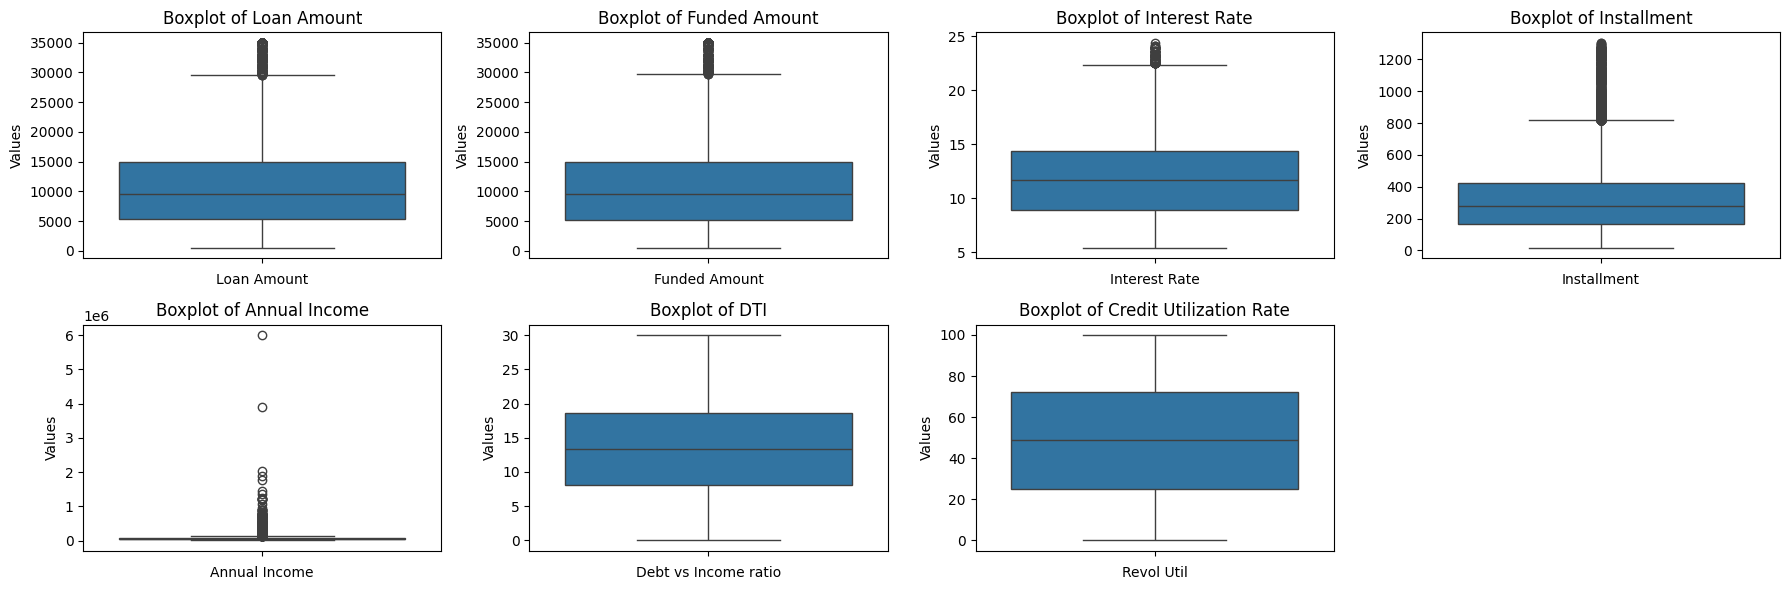

In [51]:
fig, axes = plt.subplots(2, 4, figsize=(18, 6))

# Boxplot for loan_amnt
sns.boxplot(y=df['loan_amnt'], ax=axes[0, 0])
axes[0, 0].set_title("Boxplot of Loan Amount")
axes[0, 0].set_xlabel("Loan Amount")
axes[0, 0].set_ylabel("Values")

# Boxplot for funded_amnt
sns.boxplot(y=df['funded_amnt'], ax=axes[0, 1])
axes[0, 1].set_title("Boxplot of Funded Amount")
axes[0, 1].set_xlabel("Funded Amount")
axes[0, 1].set_ylabel("Values")

# Boxplot for int_rate
sns.boxplot(y=df['int_rate'], ax=axes[0, 2])
axes[0, 2].set_title("Boxplot of Interest Rate")
axes[0, 2].set_xlabel("Interest Rate")
axes[0, 2].set_ylabel("Values")

# Boxplot for installment
sns.boxplot(y=df['installment'], ax=axes[0, 3])
axes[0, 3].set_title("Boxplot of Installment")
axes[0, 3].set_xlabel("Installment")
axes[0, 3].set_ylabel("Values")

# Boxplot for annual_inc
sns.boxplot(y=df['annual_inc'], ax=axes[1, 0])
axes[1, 0].set_title("Boxplot of Annual Income")
axes[1, 0].set_xlabel("Annual Income")
axes[1, 0].set_ylabel("Values")

# Boxplot for dti
sns.boxplot(y=df['dti'], ax=axes[1, 1])
axes[1, 1].set_title("Boxplot of DTI")
axes[1, 1].set_xlabel("Debt vs Income ratio")
axes[1, 1].set_ylabel("Values")

# Boxplot for revol_util
sns.boxplot(y=df['revol_util'], ax=axes[1, 2])
axes[1, 2].set_title("Boxplot of Credit Utilization Rate")
axes[1, 2].set_xlabel("Revol Util")
axes[1, 2].set_ylabel("Values")

# Remove unused subplot (axes[1, 3])
fig.delaxes(axes[1, 3])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


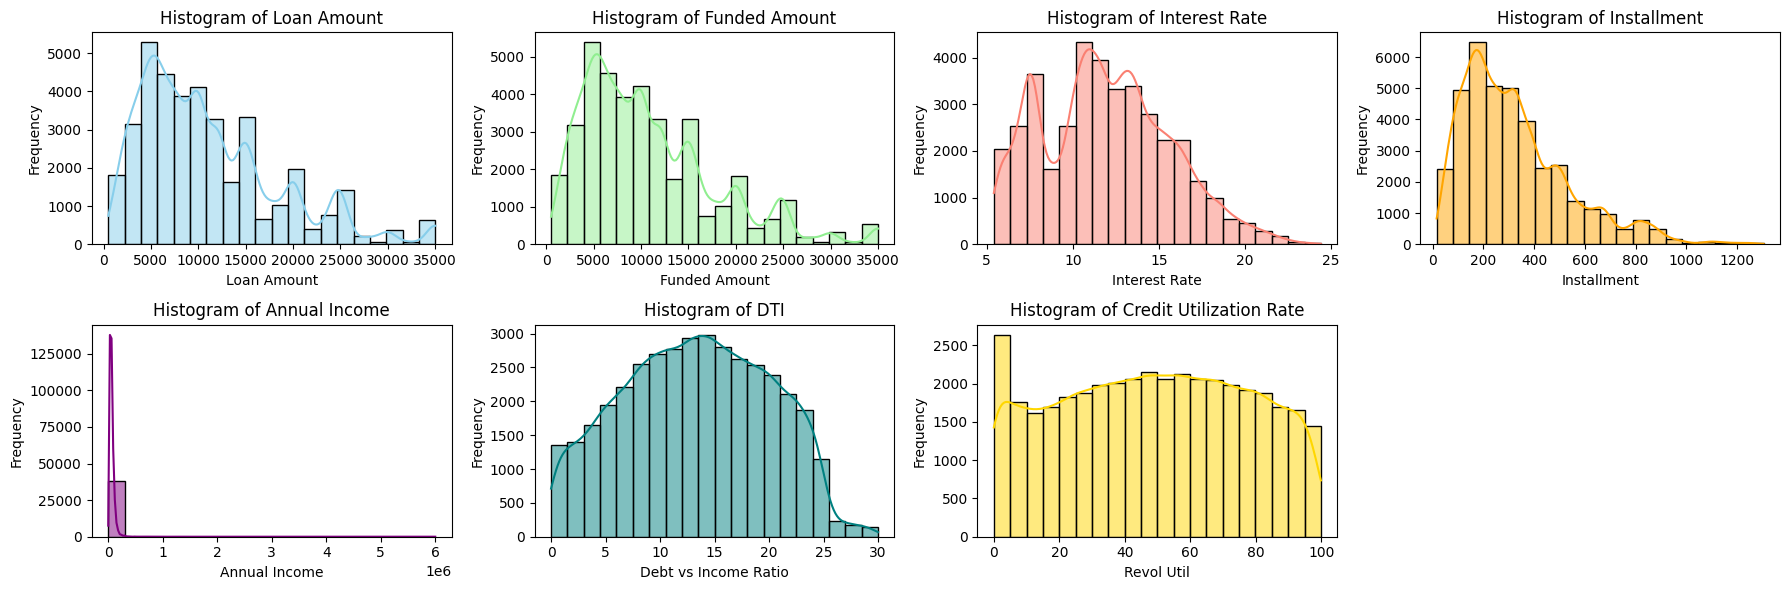

In [52]:
fig, axes = plt.subplots(2, 4, figsize=(18, 6))

# Histogram for loan_amnt
sns.histplot(df['loan_amnt'], ax=axes[0, 0], kde=True, bins=20, color="skyblue")
axes[0, 0].set_title("Histogram of Loan Amount")
axes[0, 0].set_xlabel("Loan Amount")
axes[0, 0].set_ylabel("Frequency")

# Histogram for funded_amnt
sns.histplot(df['funded_amnt'], ax=axes[0, 1], kde=True, bins=20, color="lightgreen")
axes[0, 1].set_title("Histogram of Funded Amount")
axes[0, 1].set_xlabel("Funded Amount")
axes[0, 1].set_ylabel("Frequency")

# Histogram for int_rate
sns.histplot(df['int_rate'], ax=axes[0, 2], kde=True, bins=20, color="salmon")
axes[0, 2].set_title("Histogram of Interest Rate")
axes[0, 2].set_xlabel("Interest Rate")
axes[0, 2].set_ylabel("Frequency")

# Histogram for installment
sns.histplot(df['installment'], ax=axes[0, 3], kde=True, bins=20, color="orange")
axes[0, 3].set_title("Histogram of Installment")
axes[0, 3].set_xlabel("Installment")
axes[0, 3].set_ylabel("Frequency")

# Histogram for annual_inc
sns.histplot(df['annual_inc'], ax=axes[1, 0], kde=True, bins=20, color="purple")
axes[1, 0].set_title("Histogram of Annual Income")
axes[1, 0].set_xlabel("Annual Income")
axes[1, 0].set_ylabel("Frequency")

# Histogram for dti
sns.histplot(df['dti'], ax=axes[1, 1], kde=True, bins=20, color="teal")
axes[1, 1].set_title("Histogram of DTI")
axes[1, 1].set_xlabel("Debt vs Income Ratio")
axes[1, 1].set_ylabel("Frequency")

# Histogram for revol_util
sns.histplot(df['revol_util'], ax=axes[1, 2], kde=True, bins=20, color="gold")
axes[1, 2].set_title("Histogram of Credit Utilization Rate")
axes[1, 2].set_xlabel("Revol Util")
axes[1, 2].set_ylabel("Frequency")

# Remove unused subplot (axes[1, 3])
fig.delaxes(axes[1, 3])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [53]:
# checking outliers for annual income
q1_annualIncome = df.annual_inc.quantile(0.25)
q3_annualIncome = df.annual_inc.quantile(0.75)
iqr_annualIncome = q3_annualIncome - q1_annualIncome
iqr_annualIncome

upper_bound_annualIncome = q3_annualIncome + 1.5*iqr_annualIncome
# dropping outliers from annual income 
df = df[df.annual_inc <= upper_bound_annualIncome] 

In [54]:
df.shape

(36764, 22)

In [55]:
# # correcting for installments 
# q1_installments = df.installment.quantile(0.25)
# q3_installments = df.installment.quantile(0.75)
# iqr_installments = q3_installments - q1_installments
# iqr_installments

# upperbound_installments = q3_installments + 1.5 * iqr_installments
# # dropping installment more than upper bound installments 
# df = df[df.installment <= upperbound_installments]

In [56]:
df.shape

(36764, 22)

In [57]:
# # correcting for loan_amnt 
# q1_loan_amnt = df.loan_amnt.quantile(0.25)
# q3_loan_amnt = df.loan_amnt.quantile(0.75)
# iqr_loan_amnt = q3_loan_amnt - q1_loan_amnt
# iqr_loan_amnt

# upperbound_loan_amnt = q3_loan_amnt + 1.5 * iqr_loan_amnt
# # dropping loan_amnt more than upper bound installments 
# df = df[df.loan_amnt <= upperbound_loan_amnt]

In [58]:
df.shape

(36764, 22)

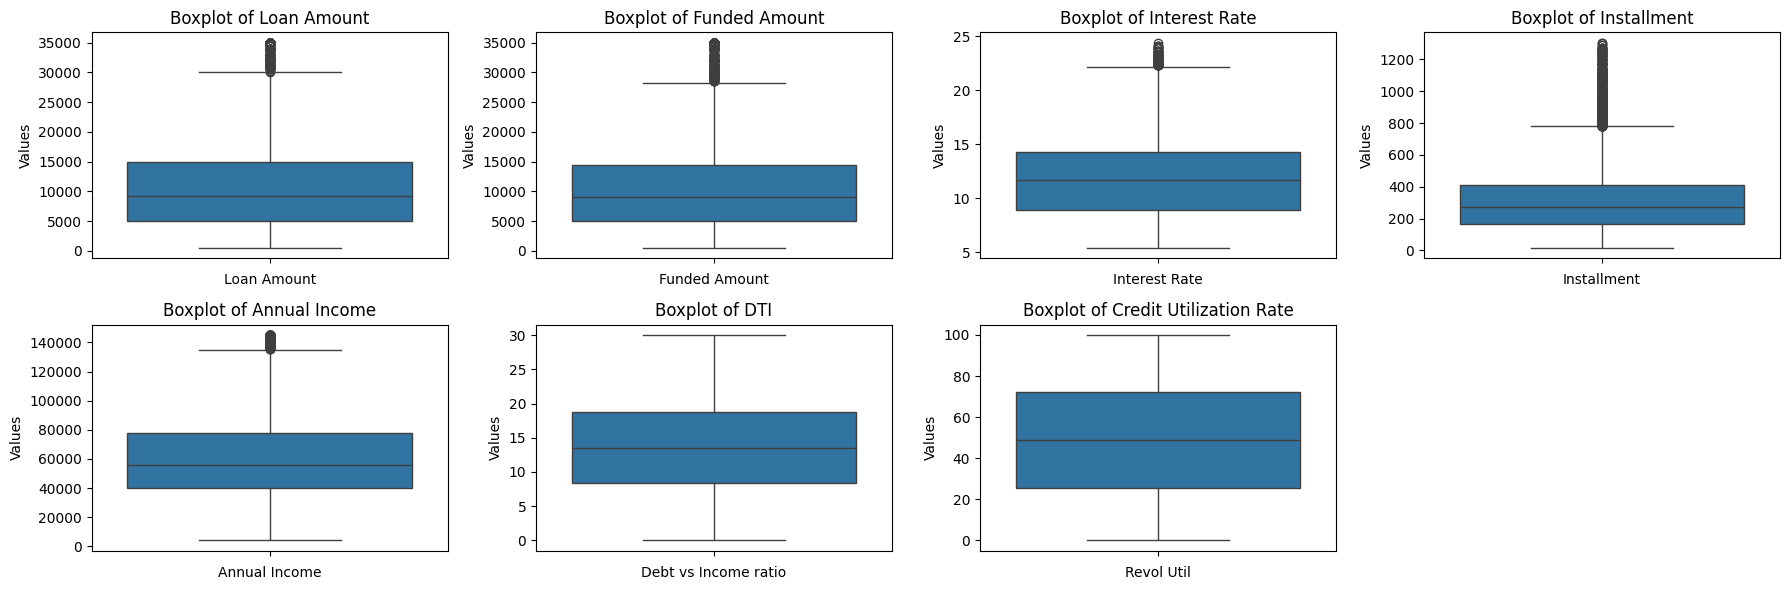

In [59]:
fig, axes = plt.subplots(2, 4, figsize=(18, 6))

# Boxplot for loan_amnt
sns.boxplot(y=df['loan_amnt'], ax=axes[0, 0])
axes[0, 0].set_title("Boxplot of Loan Amount")
axes[0, 0].set_xlabel("Loan Amount")
axes[0, 0].set_ylabel("Values")

# Boxplot for funded_amnt
sns.boxplot(y=df['funded_amnt'], ax=axes[0, 1])
axes[0, 1].set_title("Boxplot of Funded Amount")
axes[0, 1].set_xlabel("Funded Amount")
axes[0, 1].set_ylabel("Values")

# Boxplot for int_rate
sns.boxplot(y=df['int_rate'], ax=axes[0, 2])
axes[0, 2].set_title("Boxplot of Interest Rate")
axes[0, 2].set_xlabel("Interest Rate")
axes[0, 2].set_ylabel("Values")

# Boxplot for installment
sns.boxplot(y=df['installment'], ax=axes[0, 3])
axes[0, 3].set_title("Boxplot of Installment")
axes[0, 3].set_xlabel("Installment")
axes[0, 3].set_ylabel("Values")

# Boxplot for annual_inc
sns.boxplot(y=df['annual_inc'], ax=axes[1, 0])
axes[1, 0].set_title("Boxplot of Annual Income")
axes[1, 0].set_xlabel("Annual Income")
axes[1, 0].set_ylabel("Values")

# Boxplot for dti
sns.boxplot(y=df['dti'], ax=axes[1, 1])
axes[1, 1].set_title("Boxplot of DTI")
axes[1, 1].set_xlabel("Debt vs Income ratio")
axes[1, 1].set_ylabel("Values")

# Boxplot for revol_util
sns.boxplot(y=df['revol_util'], ax=axes[1, 2])
axes[1, 2].set_title("Boxplot of Credit Utilization Rate")
axes[1, 2].set_xlabel("Revol Util")
axes[1, 2].set_ylabel("Values")

# Remove unused subplot (axes[1, 3])
fig.delaxes(axes[1, 3])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


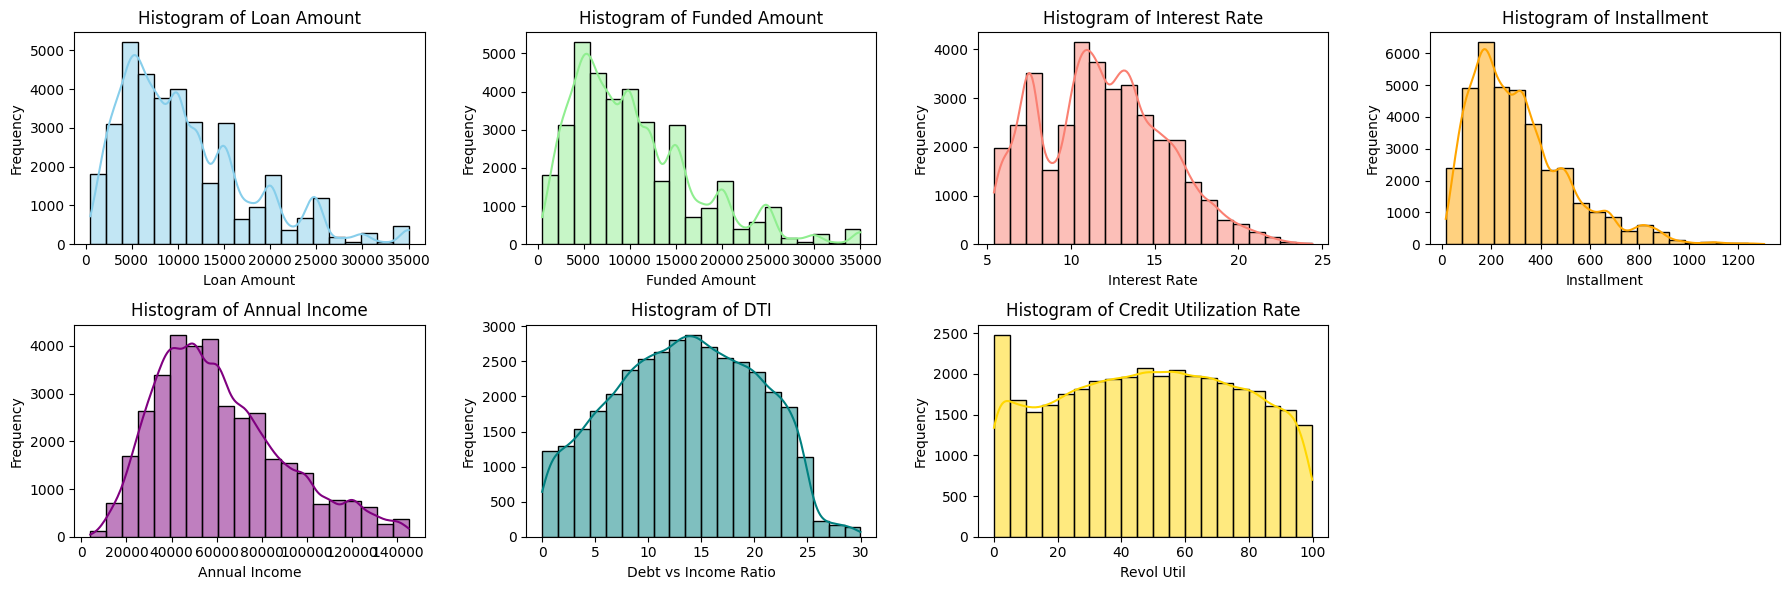

In [60]:
fig, axes = plt.subplots(2, 4, figsize=(18, 6))

# Histogram for loan_amnt
sns.histplot(df['loan_amnt'], ax=axes[0, 0], kde=True, bins=20, color="skyblue")
axes[0, 0].set_title("Histogram of Loan Amount")
axes[0, 0].set_xlabel("Loan Amount")
axes[0, 0].set_ylabel("Frequency")

# Histogram for funded_amnt
sns.histplot(df['funded_amnt'], ax=axes[0, 1], kde=True, bins=20, color="lightgreen")
axes[0, 1].set_title("Histogram of Funded Amount")
axes[0, 1].set_xlabel("Funded Amount")
axes[0, 1].set_ylabel("Frequency")

# Histogram for int_rate
sns.histplot(df['int_rate'], ax=axes[0, 2], kde=True, bins=20, color="salmon")
axes[0, 2].set_title("Histogram of Interest Rate")
axes[0, 2].set_xlabel("Interest Rate")
axes[0, 2].set_ylabel("Frequency")

# Histogram for installment
sns.histplot(df['installment'], ax=axes[0, 3], kde=True, bins=20, color="orange")
axes[0, 3].set_title("Histogram of Installment")
axes[0, 3].set_xlabel("Installment")
axes[0, 3].set_ylabel("Frequency")

# Histogram for annual_inc
sns.histplot(df['annual_inc'], ax=axes[1, 0], kde=True, bins=20, color="purple")
axes[1, 0].set_title("Histogram of Annual Income")
axes[1, 0].set_xlabel("Annual Income")
axes[1, 0].set_ylabel("Frequency")

# Histogram for dti
sns.histplot(df['dti'], ax=axes[1, 1], kde=True, bins=20, color="teal")
axes[1, 1].set_title("Histogram of DTI")
axes[1, 1].set_xlabel("Debt vs Income Ratio")
axes[1, 1].set_ylabel("Frequency")

# Histogram for revol_util
sns.histplot(df['revol_util'], ax=axes[1, 2], kde=True, bins=20, color="gold")
axes[1, 2].set_title("Histogram of Credit Utilization Rate")
axes[1, 2].set_xlabel("Revol Util")
axes[1, 2].set_ylabel("Frequency")

# Remove unused subplot (axes[1, 3])
fig.delaxes(axes[1, 3])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


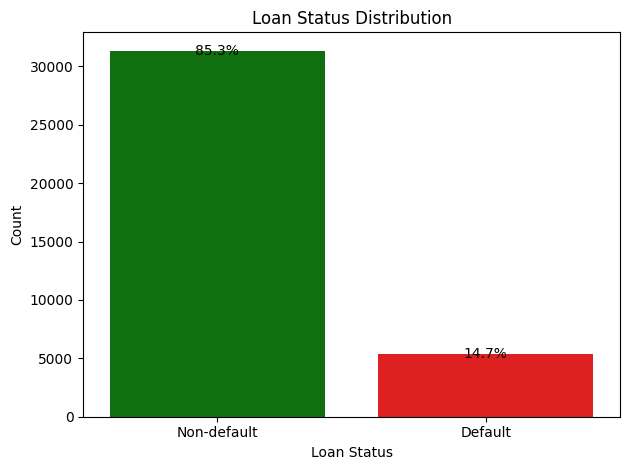

In [61]:
# Create the count plot
plot = sns.countplot(x='loan_status', data=df, palette=['Green','Red'])

# Set title and labels
plot.set(title='Loan Status Distribution', xlabel='Loan Status', ylabel='Count')

# Calculate percentages
total = len(df)
for p in plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plot.annotate(percentage, (x, y), ha='center', va='center')

# Show the plot
plt.tight_layout()
plt.show()

In [62]:
df_defaulted = df[df['loan_status'] == 'Default']
df_defaulted.shape

(5414, 22)

In [63]:
# Create a Reusable Method that would plot bar chart to analyze the loan status distribution in terms of percentage for a particular categorical variable

def plot_loan_status_percentage(df, column1, column2): 
    """
    This function takes in a dataframe and two columns to analyze the loan status distribution.
    It groups the data by the two columns, normalizes the loan status percentages, 
    and then plots a stacked bar chart.

    :param df: DataFrame containing the data
    :param column1: The first column to group by (e.g., 'purpose')
    :param column2: The second column to group by (e.g., 'loan_status')
    """
    # Group the data by the two columns and get the count of loan status
    loan_status_percentage = df.groupby([column1, column2]).size().unstack(fill_value=0)
    total_count_column1 = df.groupby(column1).size()   

    
    # Normalize the data to get percentages
    loan_status_percentage = loan_status_percentage.div(loan_status_percentage.sum(axis=1), axis=0) * 100

    # Plotting the stacked bar chart
    ax = loan_status_percentage.plot(kind='bar', stacked=True, figsize=(8, 4), color=['Red', 'lightgreen'])

    # Add title and labels
    plt.title(f'Percentage Distribution of Loan Status by {column1} and {column2}')
    plt.xlabel(column1)
    plt.ylabel('Percentage (%)')

    # Add a legend
    plt.legend(title='Loan Status')

     # Annotate the bars with percentage values
    if column1 != 'addr_state' and column1 != 'sub_grade':
     for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x_position = p.get_x() + width / 2
        y_position = p.get_y() + height / 2
        percentage = f'{height:.1f}%'  # Format the percentage value
        ax.annotate(percentage, (x_position, y_position), color='black', ha='center', va='center')


    # Show the plot
    plt.show()

## Observation

- People having 60 month term period are more likely to defaulter

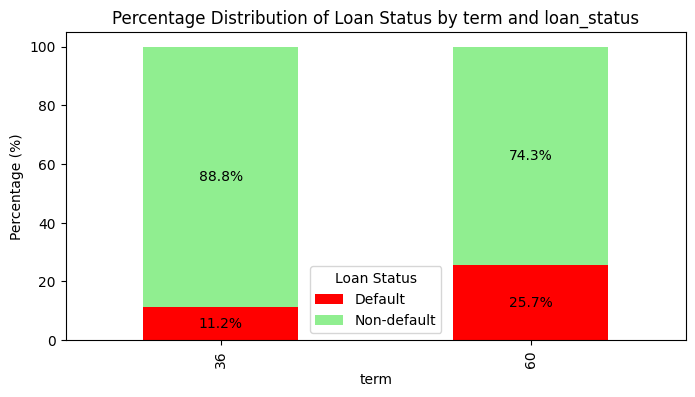

In [64]:
plot_loan_status_percentage(df,'term','loan_status')

## Observation

- Not much impactful - 10+ years have slightly higher chance of defaulter


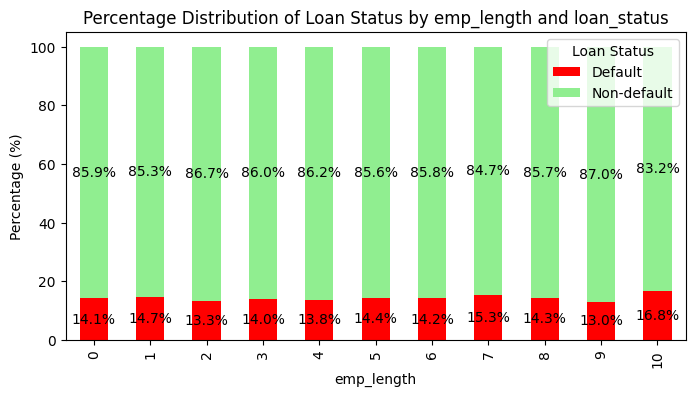

In [65]:
#  Emp_length impact 
plot_loan_status_percentage(df,'emp_length','loan_status')

## Observation 

- As Grade is decreasing (considering A as Highest) more likely to defaulter
- i.e G grade are most likely to be defaulter

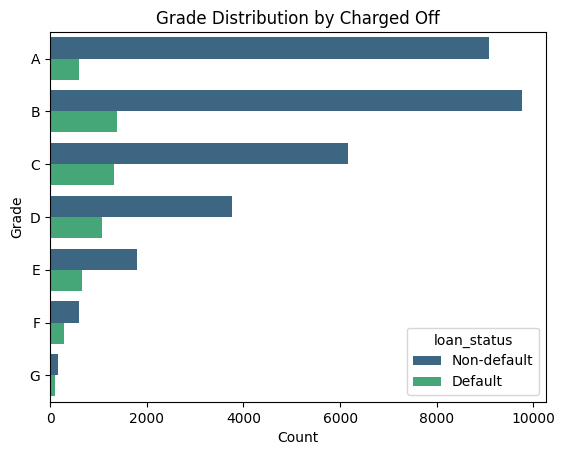

In [66]:
#  Analysing Grades impact on charged off 

sns.countplot(y='grade', data=df,order=['A','B','C','D','E','F','G'],palette='viridis',hue='loan_status').set(title='Grade Distribution by Charged Off', xlabel='Count', ylabel='Grade')
plt.show()

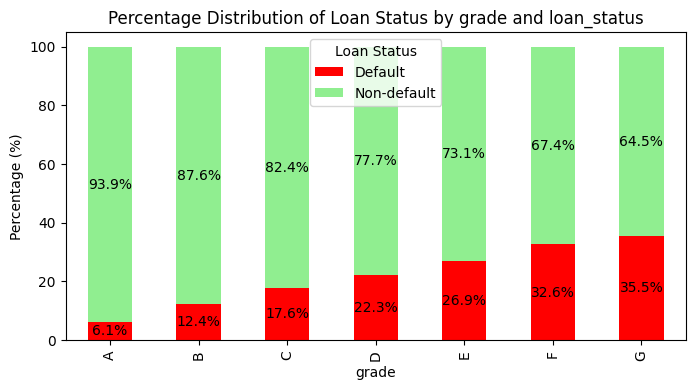

In [67]:
plot_loan_status_percentage(df,'grade','loan_status')

## Observations 

- People having F5 as subgrade are most likely to be defaulters

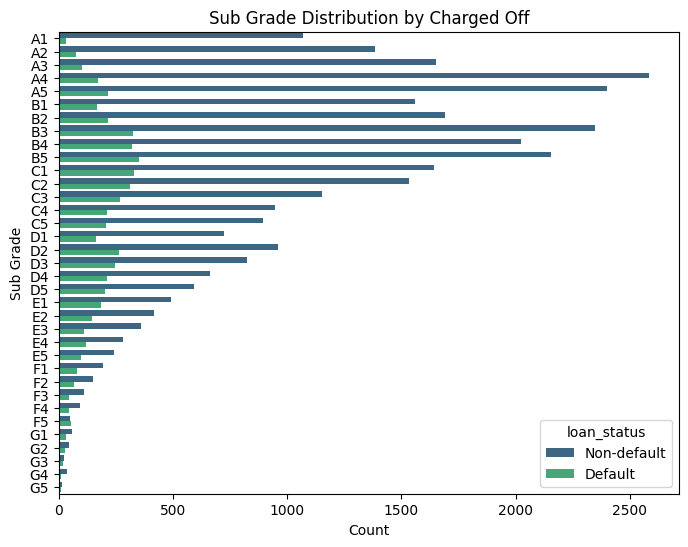

In [68]:
# using subgrades 
plt.figure(figsize=(8,6))
sns.countplot(y='sub_grade', data=df, hue = 'loan_status',order=['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'], palette='viridis').set(title='Sub Grade Distribution by Charged Off', xlabel='Count', ylabel='Sub Grade')
plt.show()

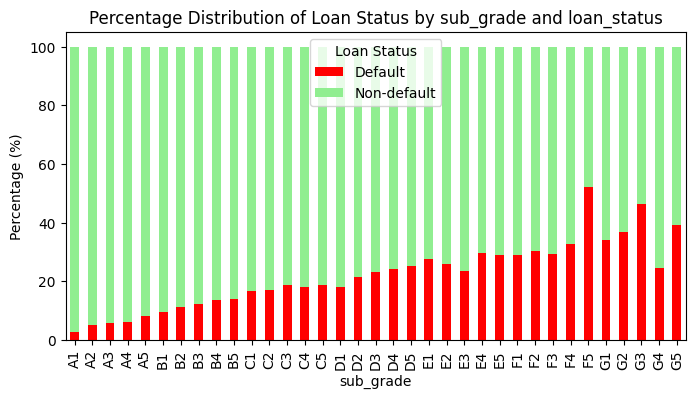

In [69]:
plot_loan_status_percentage(df,'sub_grade','loan_status')

## Observations 

- Considering None as Other only 
- People who are putting others as their home ownership are likely to have more chances of being defaulter as compared to others
  

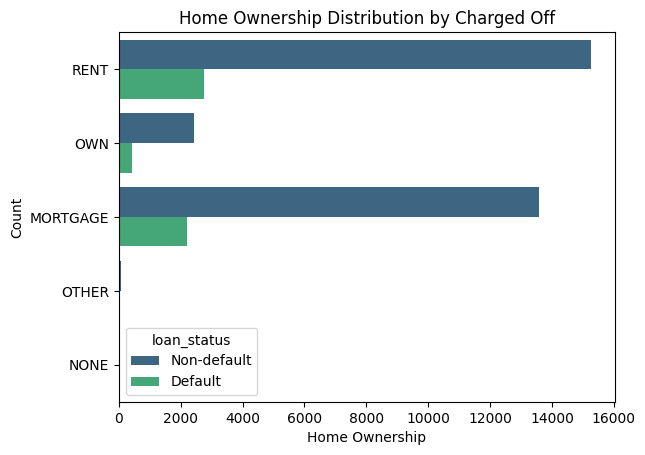

In [70]:
# analysing home-ownership impact
df_defaulted.home_ownership.value_counts()


#  Count Plot 
sns.countplot(y='home_ownership', data=df, palette='viridis',hue='loan_status').set(title='Home Ownership Distribution by Charged Off', xlabel='Home Ownership', ylabel='Count')
plt.show()

In [71]:
# Considering None as Other only 

df.home_ownership = df.home_ownership.replace({'NONE':'OTHER'})


In [72]:
df.home_ownership.value_counts()

home_ownership
RENT        18030
MORTGAGE    15783
OWN          2857
OTHER          94
Name: count, dtype: int64

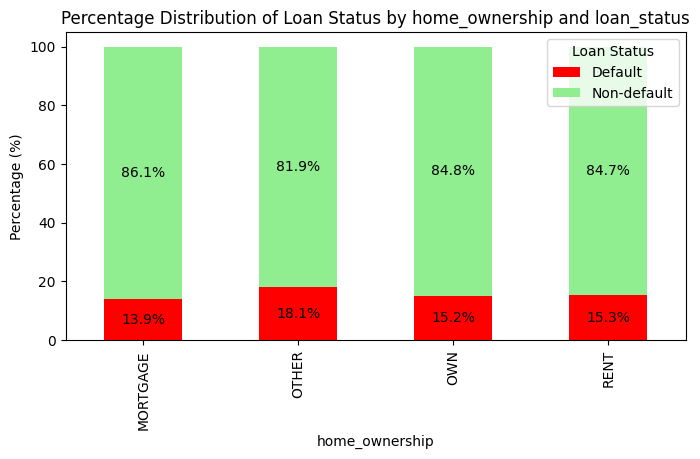

In [73]:
plot_loan_status_percentage(df,'home_ownership','loan_status')

In [74]:
# verification_status
df.verification_status.value_counts()

verification_status
Not Verified       16290
Verified           11290
Source Verified     9184
Name: count, dtype: int64

## Observations 

- Not much impactful here

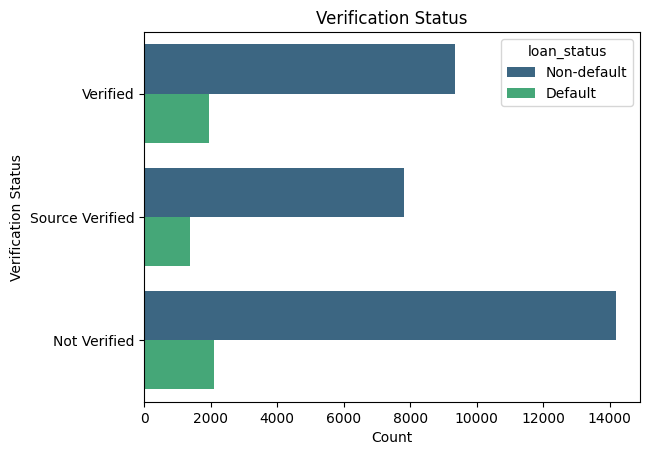

In [75]:
sns.countplot(y='verification_status', data=df, palette='viridis',hue='loan_status').set(title='Verification Status', ylabel='Verification Status', xlabel='Count')
plt.show()

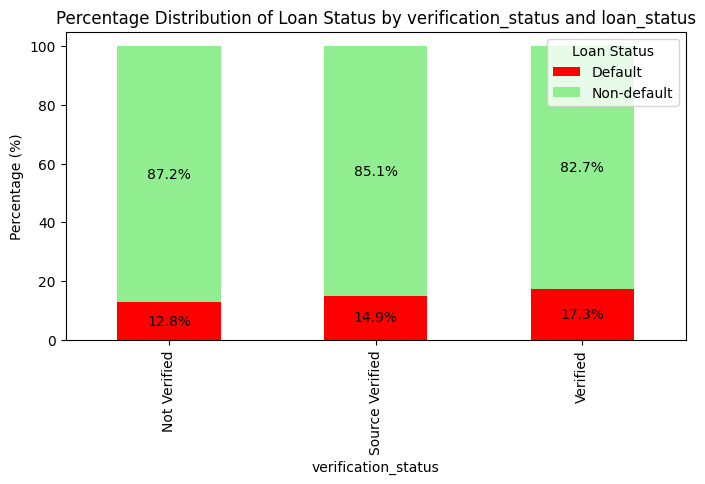

In [76]:
plot_loan_status_percentage(df,'verification_status','loan_status')

## Observation 
- Most 
- Most defaulter are from small_business, renewable energy, others 

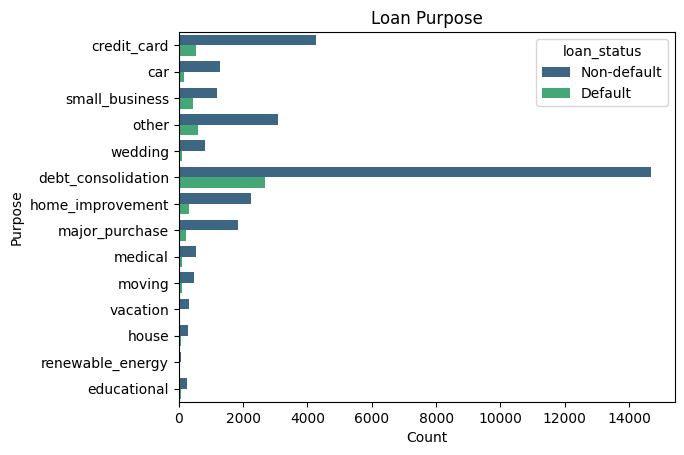

In [77]:
sns.countplot(y='purpose', data=df, palette='viridis',hue='loan_status').set(title='Loan Purpose', ylabel='Purpose', xlabel='Count')
plt.show()

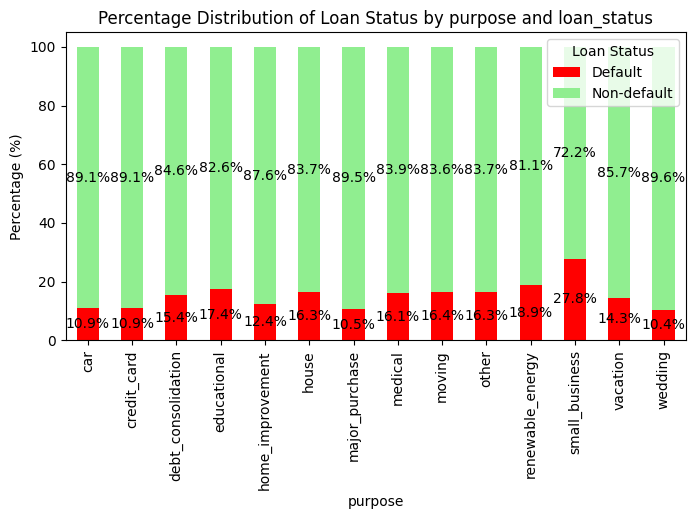

In [78]:
plot_loan_status_percentage(df,'purpose','loan_status')

In [79]:
df

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,last_credit_pull_d
0,5000,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Non-default,credit_card,27.65,Jan-85,1,3,0,83.7,9,May-16
1,2500,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Default,car,1.00,Apr-99,5,3,0,9.4,4,Sep-13
2,2400,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Non-default,small_business,8.72,Nov-01,2,2,0,98.5,10,May-16
3,10000,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Non-default,other,20.00,Feb-96,1,10,0,21.0,37,Apr-16
5,5000,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Non-default,wedding,11.20,Nov-04,3,9,0,28.3,12,Jan-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,5000,5000,36,8.70,158.30,B,B1,5,MORTGAGE,75000.0,Not Verified,Jul-07,Non-default,credit_card,15.55,May-94,0,10,0,23.0,29,Nov-14
39712,2500,2500,36,8.07,78.42,A,A4,4,MORTGAGE,110000.0,Not Verified,Jul-07,Non-default,home_improvement,11.33,Nov-90,0,13,0,13.1,40,Jun-10
39713,8500,8500,36,10.28,275.38,C,C1,3,RENT,18000.0,Not Verified,Jul-07,Non-default,credit_card,6.40,Dec-86,1,6,0,26.9,9,Jul-10
39714,5000,5000,36,8.07,156.84,A,A4,0,MORTGAGE,100000.0,Not Verified,Jul-07,Non-default,debt_consolidation,2.30,Oct-98,0,11,0,19.4,20,Jun-07


## Observation

- Most defaulters are those who inquired more than 3 times in last 6 months


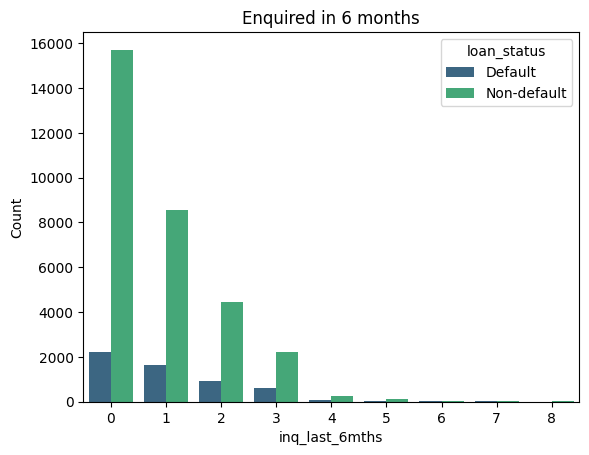

In [80]:
sns.countplot(x='inq_last_6mths', data=df, palette='viridis',hue='loan_status').set(title='Enquired in 6 months', ylabel='Count', xlabel='inq_last_6mths')
plt.show()

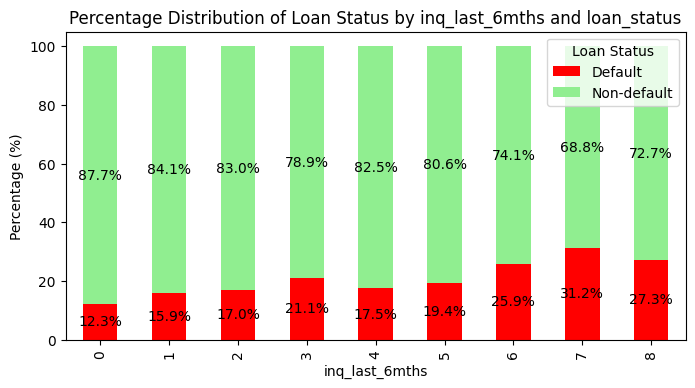

In [81]:
plot_loan_status_percentage(df,'inq_last_6mths','loan_status')

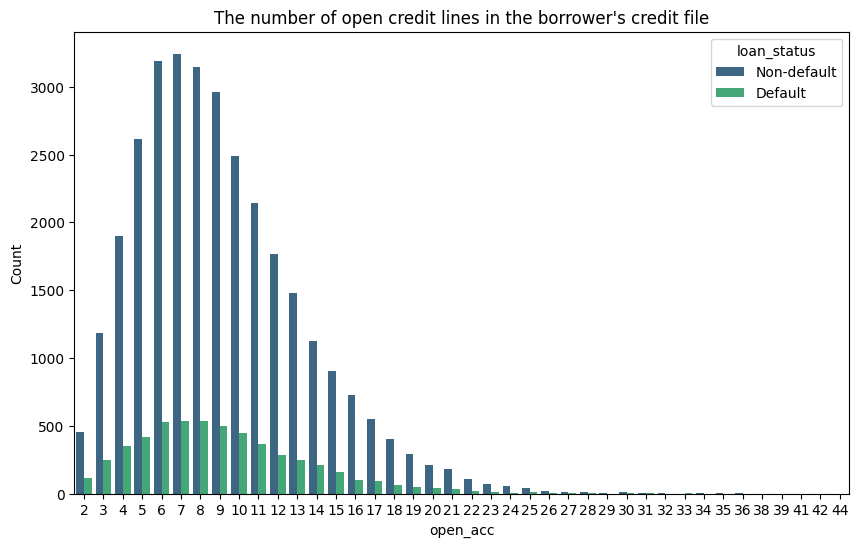

In [82]:
plt.figure(figsize=(10,6))
sns.countplot(x='open_acc', data=df, palette='viridis',hue='loan_status').set(title="The number of open credit lines in the borrower's credit file", ylabel='Count', xlabel='open_acc')
plt.show()

In [83]:
bins = [0, 10, 20, 30, 40, 50]
labels = ['0-10', '10-20', '20-30', '30-40','40-50']
df['open_acc_t'] = pd.cut(df['open_acc'], bins=bins, labels=labels, include_lowest=True)
df

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,last_credit_pull_d,open_acc_t
0,5000,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Non-default,credit_card,27.65,Jan-85,1,3,0,83.7,9,May-16,0-10
1,2500,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Default,car,1.00,Apr-99,5,3,0,9.4,4,Sep-13,0-10
2,2400,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Non-default,small_business,8.72,Nov-01,2,2,0,98.5,10,May-16,0-10
3,10000,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Non-default,other,20.00,Feb-96,1,10,0,21.0,37,Apr-16,0-10
5,5000,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Non-default,wedding,11.20,Nov-04,3,9,0,28.3,12,Jan-16,0-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,5000,5000,36,8.70,158.30,B,B1,5,MORTGAGE,75000.0,Not Verified,Jul-07,Non-default,credit_card,15.55,May-94,0,10,0,23.0,29,Nov-14,0-10
39712,2500,2500,36,8.07,78.42,A,A4,4,MORTGAGE,110000.0,Not Verified,Jul-07,Non-default,home_improvement,11.33,Nov-90,0,13,0,13.1,40,Jun-10,10-20
39713,8500,8500,36,10.28,275.38,C,C1,3,RENT,18000.0,Not Verified,Jul-07,Non-default,credit_card,6.40,Dec-86,1,6,0,26.9,9,Jul-10,0-10
39714,5000,5000,36,8.07,156.84,A,A4,0,MORTGAGE,100000.0,Not Verified,Jul-07,Non-default,debt_consolidation,2.30,Oct-98,0,11,0,19.4,20,Jun-07,10-20


## Observation 

- Peoples who have in between 30-40 number of open credit lines in the borrower's credit file are more likely to be defaulter

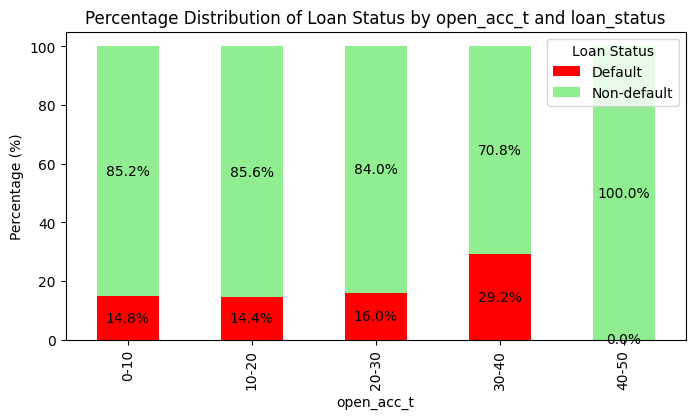

In [84]:
plot_loan_status_percentage(df,'open_acc_t','loan_status')

## Observation


- If the person is taking a loan at a high or higher interest rate, they are likely to be in the defaulter category
- More than 15% interest rate higher number of chances of defaulter category

In [85]:
df['int_rate'].describe()

count    36764.000000
mean        11.884995
std          3.667396
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

In [86]:
df['int_rate_t'] = pd.cut(df['int_rate'], bins=[0,5,10,15,20,25],labels=['0-5','5-10','10-15','15-20','20-25'],include_lowest=True)

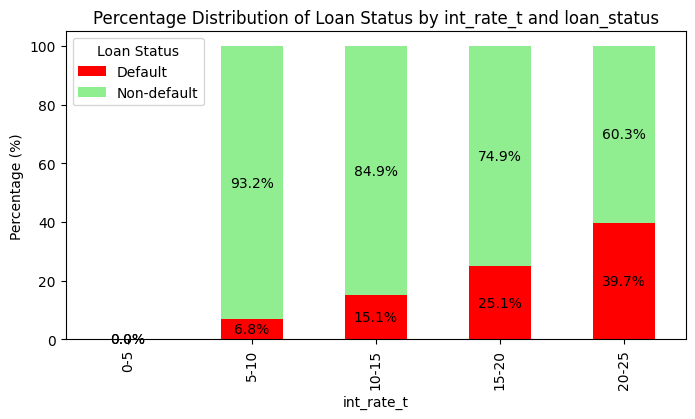

In [87]:
plot_loan_status_percentage(df,'int_rate_t','loan_status')

## Observations : 
- As annual income increases chances of defaulter decreases

In [88]:
df.annual_inc.describe()

count     36764.000000
mean      61248.532623
std       28211.596094
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      145000.000000
Name: annual_inc, dtype: float64

In [89]:
df['annual_income_t'] = pd.cut(df['annual_inc'],bins=[0,20000,40000,60000,80000,100000,120000,140000,160000],
                               labels=['0-20000','20000-40000','40000-60000','60000-80000','80000-100000','100000-120000','120000-140000','140000-160000'])

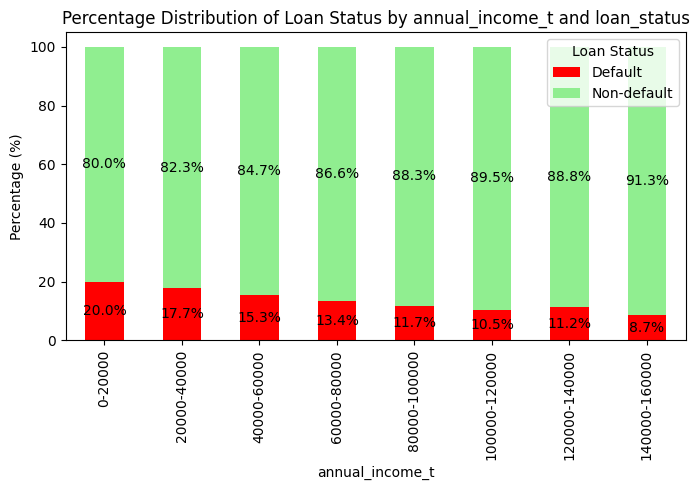

In [90]:
plot_loan_status_percentage(df, 'annual_income_t','loan_status')

In [91]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,last_credit_pull_d,open_acc_t,int_rate_t,annual_income_t
0,5000,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Non-default,credit_card,27.65,Jan-85,1,3,0,83.7,9,May-16,0-10,10-15,20000-40000
1,2500,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Default,car,1.00,Apr-99,5,3,0,9.4,4,Sep-13,0-10,15-20,20000-40000
2,2400,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Non-default,small_business,8.72,Nov-01,2,2,0,98.5,10,May-16,0-10,15-20,0-20000
3,10000,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Non-default,other,20.00,Feb-96,1,10,0,21.0,37,Apr-16,0-10,10-15,40000-60000
5,5000,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Non-default,wedding,11.20,Nov-04,3,9,0,28.3,12,Jan-16,0-10,5-10,20000-40000


## Observations : 

- As revol_util(Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
) increases chances of defaulter increases

In [92]:
# Revolving Credit Utilization Rate
df.revol_util.describe()

count    36764.000000
mean        48.667381
std         28.283845
min          0.000000
25%         25.300000
50%         49.000000
75%         72.100000
max         99.900000
Name: revol_util, dtype: float64

In [93]:
df['revol_util_t'] = pd.cut(df['revol_util'],bins=[0,10,20,30,40,50,60,70,80,90,100],labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])

In [94]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,last_credit_pull_d,open_acc_t,int_rate_t,annual_income_t,revol_util_t
0,5000,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Non-default,credit_card,27.65,Jan-85,1,3,0,83.7,9,May-16,0-10,10-15,20000-40000,80-90
1,2500,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Default,car,1.00,Apr-99,5,3,0,9.4,4,Sep-13,0-10,15-20,20000-40000,0-10
2,2400,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Non-default,small_business,8.72,Nov-01,2,2,0,98.5,10,May-16,0-10,15-20,0-20000,90-100
3,10000,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Non-default,other,20.00,Feb-96,1,10,0,21.0,37,Apr-16,0-10,10-15,40000-60000,20-30
5,5000,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Non-default,wedding,11.20,Nov-04,3,9,0,28.3,12,Jan-16,0-10,5-10,20000-40000,20-30


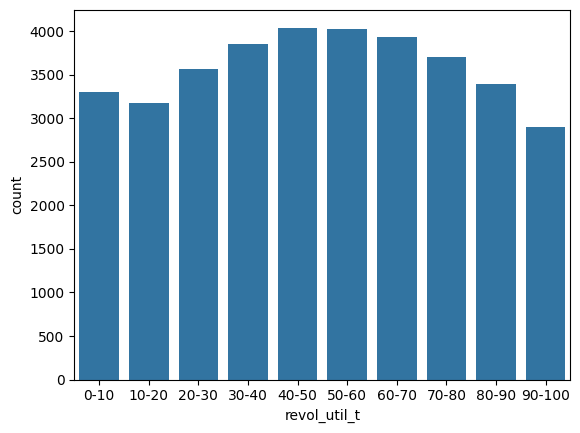

In [95]:
sns.countplot(df,x='revol_util_t')
plt.show()

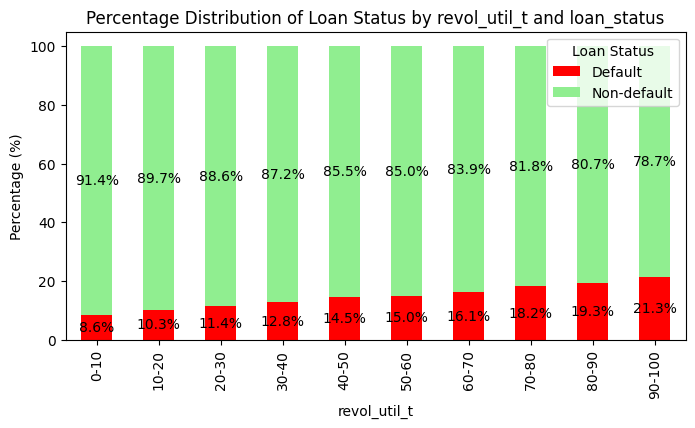

In [96]:
plot_loan_status_percentage(df,'revol_util_t','loan_status')

## Observations

- Not Much Impactful 
- Although there are very few observations with higher values of installments, higher installments may lead to defaulters.

In [97]:
df.installment.describe()

count    36764.000000
mean       312.807669
std        199.815486
min         15.690000
25%        163.520000
50%        271.440000
75%        410.020000
max       1305.190000
Name: installment, dtype: float64

In [107]:
df['installment_t'] = pd.cut(df['installment'], bins=[50, 150, 250, 350, 450, 550, 650, 750, 850, 950, 1050, 1150, 1250, 1350], labels=['50-149', '150-249', '250-349', '350-449', '450-549', '550-649', '650-749', '750-849', '850-949', '950-1049', '1050-1149', '1150-1249', '1250-1349'])

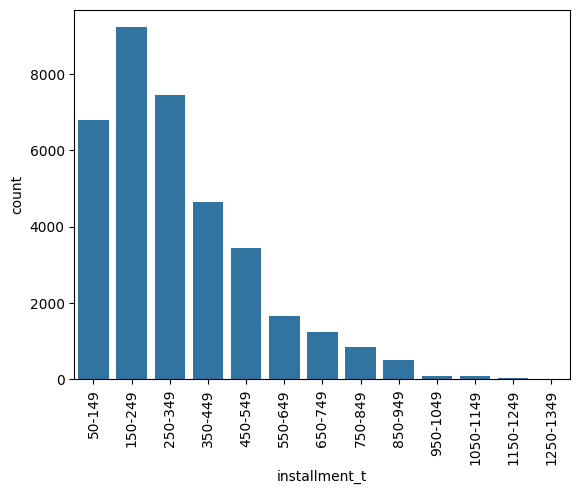

In [110]:
sns.countplot(x='installment_t',data=df)
plt.xticks(rotation=90)
plt.show()

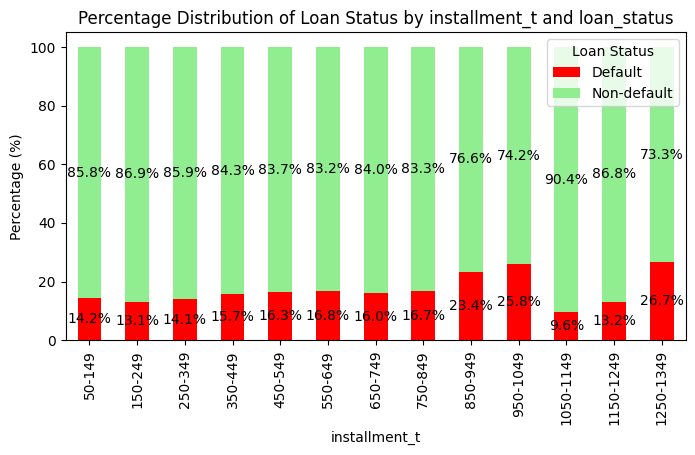

In [111]:
plot_loan_status_percentage(df,'installment_t','loan_status')

## Observations :

- Higher DTI Rate could leads to defaulters

In [98]:
df.dti.describe()

count    36764.000000
mean        13.441881
std          6.658737
min          0.000000
25%          8.340000
50%         13.570000
75%         18.700000
max         29.990000
Name: dti, dtype: float64

In [99]:
df['dti_t'] = pd.cut(df['dti'], bins=[0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

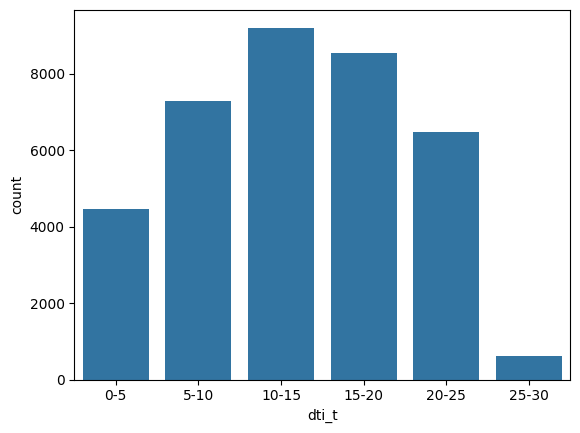

In [100]:
sns.countplot(df,x='dti_t')
plt.show()

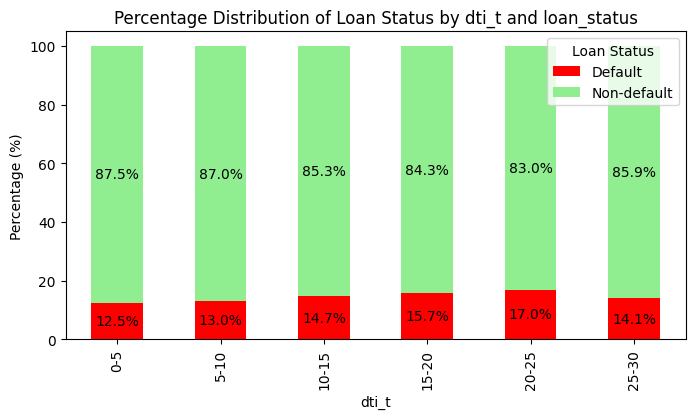

In [101]:
plot_loan_status_percentage(df,'dti_t','loan_status')

## Observations :

- term and int_rate are positively correlated with loan_status
- annual_income is slightly correlated with loan_status

In [102]:
df['loan_status_encoded'] = df['loan_status'].map({'Default':1,'Non-default':0})

In [103]:
numeric_cols = df.select_dtypes(include=['number'])
numeric_cols

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,loan_status_encoded
0,5000,5000,36,10.65,162.87,10,24000.0,27.65,1,3,0,83.7,9,0
1,2500,2500,60,15.27,59.83,0,30000.0,1.00,5,3,0,9.4,4,1
2,2400,2400,36,15.96,84.33,10,12252.0,8.72,2,2,0,98.5,10,0
3,10000,10000,36,13.49,339.31,10,49200.0,20.00,1,10,0,21.0,37,0
5,5000,5000,36,7.90,156.46,3,36000.0,11.20,3,9,0,28.3,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,5000,5000,36,8.70,158.30,5,75000.0,15.55,0,10,0,23.0,29,0
39712,2500,2500,36,8.07,78.42,4,110000.0,11.33,0,13,0,13.1,40,0
39713,8500,8500,36,10.28,275.38,3,18000.0,6.40,1,6,0,26.9,9,0
39714,5000,5000,36,8.07,156.84,0,100000.0,2.30,0,11,0,19.4,20,0


<Axes: >

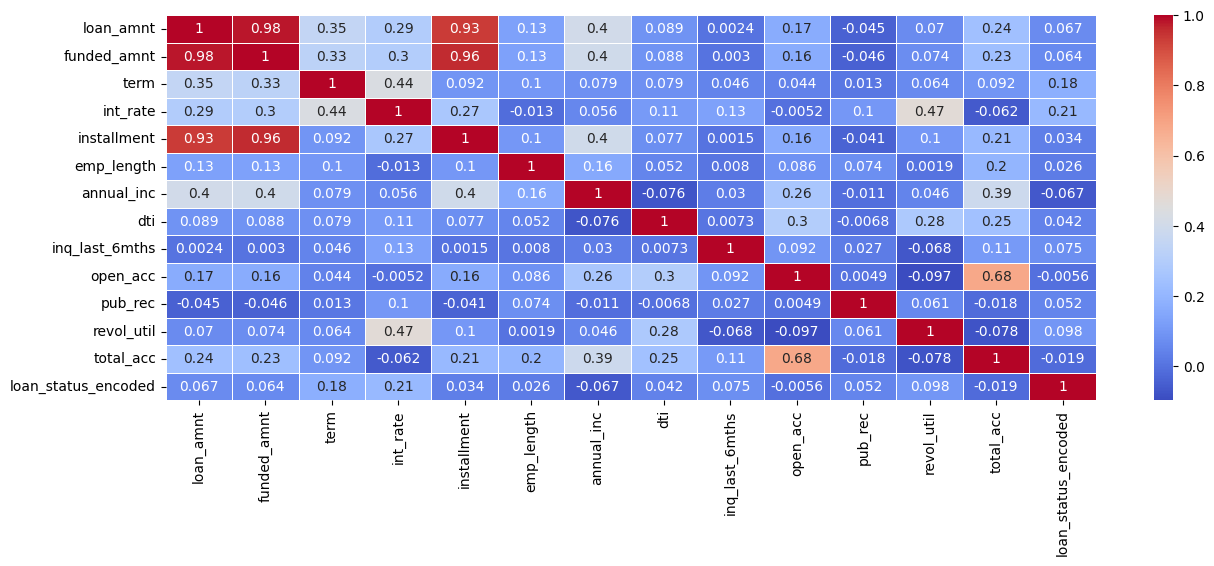

In [104]:
# Heatmap
plt.figure(figsize=(15,5))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", linewidths=0.5, linecolor="white")
